In [521]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_validate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

In [522]:
#import dataset
df = pd.read_csv('dataset/gold.csv')

In [523]:
#EDA

In [524]:
#steps: head, shape, info, describe, missing values

In [525]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/11/2022,"1,768.85","1,755.50","1,770.55","1,750.35",NaN,0.86%
1,11/10/2022,"1,753.70","1,709.70","1,760.60","1,705.50",305.72K,2.33%
2,11/09/2022,"1,713.70","1,715.20","1,725.80","1,705.10",239.65K,-0.13%
3,11/08/2022,"1,716.00","1,678.00","1,720.40","1,667.10",297.62K,2.11%
4,11/07/2022,"1,680.50","1,678.60","1,685.60","1,670.00",187.59K,0.23%


In [526]:
df = df.rename(columns={'Vol.': 'Volume'})

In [527]:
df.shape

(3322, 7)

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3322 non-null   object
 1   Price     3322 non-null   object
 2   Open      3322 non-null   object
 3   High      3322 non-null   object
 4   Low       3322 non-null   object
 5   Volume    3317 non-null   object
 6   Change %  3322 non-null   object
dtypes: object(7)
memory usage: 181.8+ KB


In [529]:
df.describe().T

,count,unique,top,freq
Date,3322,3322,11/11/2022,1
Price,3322,2598,"1,198.00",5
Open,3322,2592,"1,223.00",5
High,3322,2573,"1,304.80",6
Low,3322,2580,"1,190.00",5
Volume,3317,1910,0.02K,57
Change %,3322,522,0.00%,36


In [530]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Volume      5
Change %    0
dtype: int64

In [531]:
df['Volume'] = df['Volume'].str.replace('.', '').str.replace('K', '0')
df['Price'] = df['Price'].str.replace(',', '')
df['Open'] = df['Open'].str.replace(',', '')
df['High'] = df['High'].str.replace(',', '')
df['Low'] = df['Low'].str.replace(',', '')

In [532]:
df.head()

,Date,Price,Open,High,Low,Volume,Change %
0,11/11/2022,1768.85,1755.50,1770.55,1750.35,NaN,0.86%
1,11/10/2022,1753.70,1709.70,1760.60,1705.50,305720,2.33%
2,11/09/2022,1713.70,1715.20,1725.80,1705.10,239650,-0.13%
3,11/08/2022,1716.00,1678.00,1720.40,1667.10,297620,2.11%
4,11/07/2022,1680.50,1678.60,1685.60,1670.00,187590,0.23%


In [533]:
df = df.astype({'Price':'float' ,
                'Open':'float', 
                'Volume':'float',
                'Low':'float',
                'High':'float',
               'Date':'datetime64[ns]'})

In [534]:
# fill nulls using Imputation
df['Volume'] = round(df['Volume'].interpolate());

In [535]:
df

,Date,Price,Open,High,Low,Volume,Change %
0,2022-11-11,1768.85,1755.5,1770.55,1750.35,NaN,0.86%
1,2022-11-10,1753.70,1709.7,1760.60,1705.50,305720.0,2.33%
2,2022-11-09,1713.70,1715.2,1725.80,1705.10,239650.0,-0.13%
3,2022-11-08,1716.00,1678.0,1720.40,1667.10,297620.0,2.11%
4,2022-11-07,1680.50,1678.6,1685.60,1670.00,187590.0,0.23%
...,...,...,...,...,...,...,...
3317,2010-01-08,1139.60,1129.5,1140.40,1121.00,150.0,0.46%
3318,2010-01-07,1134.40,1139.1,1139.10,1130.30,110.0,-0.25%
3319,2010-01-06,1137.20,1119.4,1140.90,1119.40,120.0,1.59%
3320,2010-01-05,1119.40,1122.5,1128.10,1116.60,100.0,0.04%


In [536]:
df = df.iloc[1:, :]
df = df.drop(['Change %', 'Volume', 'Open'], axis=1)

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 1 to 3321
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3321 non-null   datetime64[ns]
 1   Price   3321 non-null   float64       
 2   High    3321 non-null   float64       
 3   Low     3321 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 103.9 KB


In [538]:
df.isnull().sum()

Date     0
Price    0
High     0
Low      0
dtype: int64

In [539]:
# calculate MA moving avg
df['Mean Avg'] = df['Price'].rolling(window=20, min_periods=1).mean()

In [540]:
#Find the duplicates on date
df['Date'].duplicated().sum()

0

In [541]:
#Display charts

In [542]:
fig = px.scatter(df, x="Date", y="Price")
fig.show()

In [543]:
Price = go.Scatter(
    x=df['Date'],
    y=df['Price'],
    name="Price",
    mode='markers'
)
MeanAvg = go.Scatter(
    x=df['Date'],
    y=df['Mean Avg'],
    name="Mean Avg",
    mode='markers'
)
data = [Price, MeanAvg]
fig = go.Figure(data=data)
fig.show()

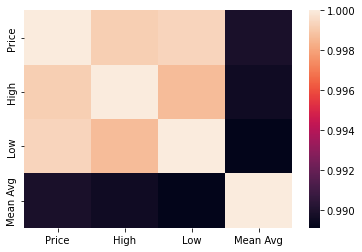

In [544]:
sns.heatmap(df.corr());

In [545]:
#splitting

In [546]:
#train-test split 
X = df.drop(['Price', 'Date'],axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [547]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [548]:
#RandomForestRegressor model

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor()

In [549]:
predict = regr.predict(X_test)

In [550]:
#cross-validation split
scores = cross_validate(regr, X, y, cv=5)
scores

{'fit_time': array([0.47802591, 0.41608477, 0.46925426, 0.45951486, 0.44863272]),
 'score_time': array([0.01007104, 0.01321602, 0.01548171, 0.01534104, 0.01392317]),
 'test_score': array([0.85169753, 0.99692687, 0.99509324, 0.99828498, 0.99835414])}

In [551]:
#metrics
fresult = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

def metrices(true_val, predicted_val):
    global fresult
    mae = metrics.mean_absolute_error(true_val, predicted_val)
    mse = metrics.mean_squared_error(true_val, predicted_val)
    rmse = np.sqrt(metrics.mean_squared_error(true_val, predicted_val))
    errors = abs(predicted_val - true_val)
    mape = 100 * (errors / true_val)
    accuracy = 100 - np.mean(mape)
    
    fresult = fresult.append({'MAE': mae,'MSE': mse, 'RMSE': rmse, 'Accuracy': round(accuracy, 2)}, ignore_index=True)
    return print('MAE:', mae, 'MSE:', mse, 'RMSE:', rmse, 'Accuracy:', round(accuracy, 2), '%.', regr) 
    
    
metrices(y_test, predict)

MAE: 5.522061685055139 MSE: 70.28278239042143 RMSE: 8.383482712478235 Accuracy: 99.62 %. RandomForestRegressor()


In [552]:
#use TimeSeriesSplit

In [553]:
df['year'] = pd.to_datetime(df.Date).dt.year
df.set_index('year', inplace=True)

In [554]:
tss = TimeSeriesSplit(n_splits = 3)

In [555]:
df.sort_index(inplace=True)
X = df.drop(labels=['Price','Date'], axis=1)
y = df['Price']

In [556]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [557]:
regr = regr.fit(X_train, y_train)
regr

RandomForestRegressor()

In [558]:
predict = regr.predict(X_test)

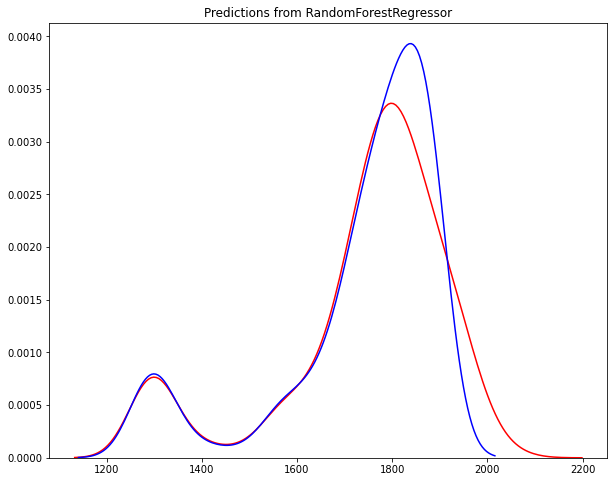

In [559]:
plt.figure(figsize=(10, 8))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predict, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Predictions from RandomForestRegressor')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

In [560]:
predictions = pd.DataFrame({"Predictions": predict, "Actual Price": y_test,  "Date": pd.date_range(start ='1-1-2023', 
                                               periods=len(predict), freq="D")})
predictions

,Predictions,Actual Price,Date
year,,,
2019,1294.281,1292.9,2023-01-01
2019,1294.804,1294.7,2023-01-02
2019,1294.671,1291.4,2023-01-03
2019,1294.917,1296.6,2023-01-04
2019,1296.251,1295.2,2023-01-05
...,...,...,...
2022,1878.897,1896.0,2025-04-05
2022,1878.666,1904.1,2025-04-06
2022,1878.844,1888.7,2025-04-07


In [561]:
Price = go.Scatter(
    x=df['Date'],
    y=df['Price'],
    name="Actual Price",
        mode='markers'

)
MeanAvg = go.Scatter(
    x=predictions['Date'],
    y=predictions['Predictions'],
    name="Predicted Prices",
        mode='markers'

)
data = [Price, MeanAvg]
fig = go.Figure(data=data)
fig.show()

In [562]:
#LinearRegression model
lr = LinearRegression()
lr = lr.fit(X_train,y_train)
lr

LinearRegression()

In [563]:
lnpredict = lr.predict(X_test)
lnpredictions = pd.DataFrame({"Predictions": lnpredict, "Actual Price": y_test,  "Date": pd.date_range(start ='1-1-2023', 
                                               periods=len(lnpredict), freq="D")})
lnpredictions

,Predictions,Actual Price,Date
year,,,
2019,1295.573774,1292.9,2023-01-01
2019,1296.152151,1294.7,2023-01-02
2019,1294.978264,1291.4,2023-01-03
2019,1295.274613,1296.6,2023-01-04
2019,1295.663085,1295.2,2023-01-05
...,...,...,...
2022,1912.039623,1896.0,2025-04-05
2022,1904.760020,1904.1,2025-04-06
2022,1894.803101,1888.7,2025-04-07


In [564]:
metrices(y_test, lnpredict)

MAE: 6.320864821791518 MSE: 76.18504368632513 RMSE: 8.728404418123917 Accuracy: 99.64 %. RandomForestRegressor()


In [565]:
Price = go.Scatter(
    x=df['Date'],
    y=df['Price'],
    name="Actual Price",
        mode='markers'

)
MeanAvg = go.Scatter(
    x=predictions['Date'],
    y=predictions['Predictions'],
    name="Predicted Prices",
        mode='markers'

)
data = [Price, MeanAvg]
fig = go.Figure(data=data)
fig.show()

In [566]:
# Ridge model
rgmodel = Ridge()
rgmodel = rgmodel.fit(X_train,y_train)
rgmodel

Ridge()

In [567]:
rgpredict = rgmodel.predict(X_test)
rgpredictions = pd.DataFrame({"Predictions": rgpredict, "Actual Price": y_test,  "Date": pd.date_range(start ='1-1-2023', 
                                               periods=len(rgpredict), freq="D")})
rgpredictions

,Predictions,Actual Price,Date
year,,,
2019,1295.573772,1292.9,2023-01-01
2019,1296.152149,1294.7,2023-01-02
2019,1294.978262,1291.4,2023-01-03
2019,1295.274611,1296.6,2023-01-04
2019,1295.663082,1295.2,2023-01-05
...,...,...,...
2022,1912.039620,1896.0,2025-04-05
2022,1904.760006,1904.1,2025-04-06
2022,1894.803093,1888.7,2025-04-07


In [568]:
metrices(y_test, rgpredict)

MAE: 6.320864185172915 MSE: 76.18503728816596 RMSE: 8.728404051610234 Accuracy: 99.64 %. RandomForestRegressor()


In [569]:
fresult

,Model,MAE,MSE,RMSE,Accuracy
0,NaN,5.522062,70.282782,8.383483,99.62
1,NaN,6.320865,76.185044,8.728404,99.64
2,NaN,6.320864,76.185037,8.728404,99.64


In [570]:
Price = go.Scatter(
    x=df['Date'],
    y=df['Price'],
    name="Actual Price",
        mode='markers'

)
MeanAvg = go.Scatter(
    x=predictions['Date'],
    y=predictions['Predictions'],
    name="Predicted Prices",
        mode='markers'

)
data = [Price, MeanAvg]
fig = go.Figure(data=data)
fig.show()

In [585]:
# table represents the final results of ML models

fresult['Model'] = np.resize(['RandomForestRegressor','LinearRegression','Ridge'],len(fresult))
fresult = fresult.set_index(fresult['Model'])
fresult = fresult.drop(['Model'], axis=1)

In [586]:
fresult

,MAE,MSE,RMSE,Accuracy
Model,,,,
RandomForestRegressor,5.522062,70.282782,8.383483,99.62
LinearRegression,6.320865,76.185044,8.728404,99.64
Ridge,6.320864,76.185037,8.728404,99.64


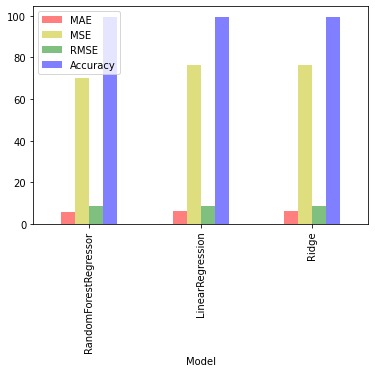

In [588]:
fresult.plot(kind='bar', alpha=0.5, color = ['r', 'y', 'g','b'])

plt.show() 